In [1]:
# Вариант 1 Выборка
data = [
    135, 133, 124, 132, 104, 152, 134, 130, 129, 120, 122, 124,
    117, 123, 123, 129, 121, 122, 125, 131, 147, 124, 137, 112,
    126, 128, 111, 129, 115, 147, 131, 132, 137, 119, 125, 120,
    129, 125, 123, 127, 132, 118, 133, 132, 132, 134, 131, 120,
    135, 132, 125, 132, 108, 114, 121, 133, 133, 135, 131, 125,
    114, 115, 122, 131, 125, 132, 120, 126, 115, 117, 118, 118,
    132, 134, 127, 127, 124, 135, 128, 127, 115, 144, 129, 120,
    137, 127, 125, 116, 132, 120, 117, 127, 118, 109, 127, 122,
    120, 135, 116, 118, 133, 136, 125, 126, 119, 126, 129, 127,
    129, 124, 127, 132, 126, 131, 127, 130, 126, 124, 135, 127,
    124, 123, 123, 130, 132, 143, 122, 139, 120, 134, 108, 132,
    121, 111, 123, 140, 137, 120, 125, 131, 118, 120, 120, 136,
    129, 127, 116, 138, 128, 133, 122, 131, 128, 140, 138, 134,
    120, 126, 109, 137, 111, 115, 117, 130, 113, 126, 115, 124,
    125, 118, 115, 128, 123, 129, 128, 120, 115, 134, 118, 135,
    134
]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
sorted_data = sorted(data)
sorted_data

[104,
 108,
 108,
 109,
 109,
 111,
 111,
 111,
 112,
 113,
 114,
 114,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 116,
 116,
 116,
 117,
 117,
 117,
 117,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 119,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 121,
 121,
 121,
 122,
 122,
 122,
 122,
 122,
 122,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 128,
 128,
 128,
 128,
 128,
 128,
 129,
 129,
 129,
 129,
 129,
 129,
 129,
 129,
 129,
 130,
 130,
 130,
 130,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 133,
 133,
 133,
 133,
 133,
 133,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 135,
 135,
 135,
 135,
 135,
 135,
 135,
 136,
 136,
 137

# 1.Составить вариационный ряд

In [4]:
# 2. Создаем DataFrame с подсчетом частоты каждого уникального значения
df = pd.DataFrame(sorted_data, columns=['Значение'])
5
# 3. Подсчитываем частоту значений
df.value_counts().sort_index()

Значение
104          1
108          2
109          2
111          3
112          1
113          1
114          2
115          8
116          3
117          4
118          8
119          2
120         13
121          3
122          6
123          7
124          8
125         10
126          8
127         12
128          6
129          9
130          4
131          8
132         13
133          6
134          7
135          7
136          2
137          5
138          2
139          1
140          2
143          1
144          1
147          2
152          1
Name: count, dtype: int64

# 2. Составить интервальный статистический ряд

In [5]:
# Шаг 1: Определение диапазона данных
min_val = min(data)
max_val = max(data)

# Шаг 2: Вычисление количества интервалов (используем правило Стерджесса)
n = len(data)
k = int(np.ceil(1 + 3.322 * np.log10(n)))  # Количество интервалов
interval_width = (max_val - min_val) / k  # Ширина интервала

# Шаг 3: Создаем интервалы
bins = np.arange(min_val, max_val + interval_width, interval_width)

# Шаг 4: Подсчитываем частоты значений в каждом интервале
frequency, bin_edges = np.histogram(data, bins=bins)

# Шаг 5: Строим DataFrame с интервалами и частотами
intervals = [f"{round(bin_edges[i], 2)}–{round(bin_edges[i+1], 2)}" for i in range(len(bin_edges)-1)]
interval_df = pd.DataFrame({
    'Интервал': intervals,
    'Частота': frequency
})

# Шаг 6: Выводим интервальный статистический ряд
interval_df

,Интервал,Частота
0,104.0–109.33,5
1,109.33–114.67,7
2,114.67–120.0,25
3,120.0–125.33,47
4,125.33–130.67,39
5,130.67–136.0,41
6,136.0–141.33,12
7,141.33–146.67,2
8,146.67–152.0,2
9,152.0–157.33,1


# 3. По сгруппированным данным построить полигон относительных частот и гистограмму относительных частот

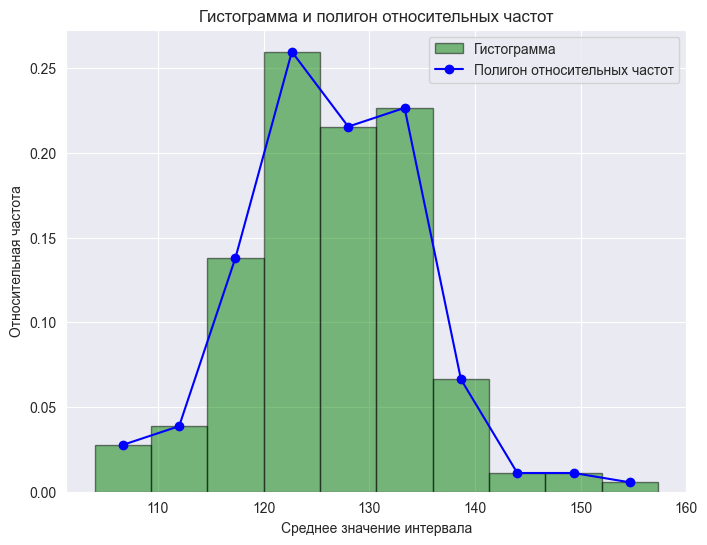

In [6]:
# Шаг 1: Вычисляем относительные частоты
relative_frequencies = frequency / n

# Шаг 2: Находим средние значения интервалов
midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

# Шаг 3: Строим график
plt.figure(figsize=(8, 6))

# Строим гистограмму относительных частот
plt.hist(midpoints, bins=bins, weights=relative_frequencies, alpha=0.5, color='g', edgecolor='black', label='Гистограмма')

# Строим полигон относительных частот
plt.plot(midpoints, relative_frequencies, marker='o', linestyle='-', color='b', label='Полигон относительных частот')

# Оформляем график
plt.title('Гистограмма и полигон относительных частот')
plt.xlabel('Среднее значение интервала')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.legend()

# Показываем график
plt.show()

# 4. Построить график эмпирической функции распределения

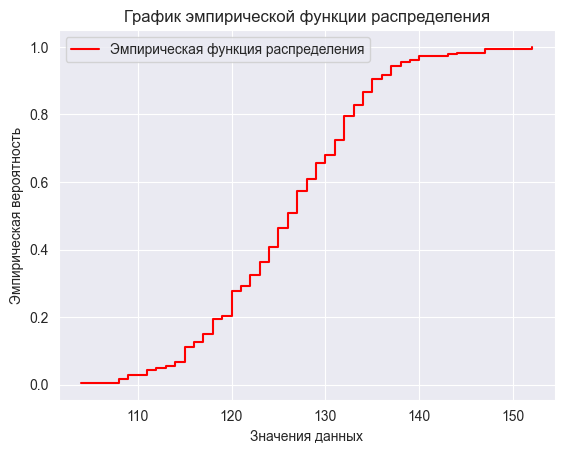

In [7]:

# Шаг 2: Рассчитываем эмпирическую функцию распределения
n = len(sorted_data)
ecdf_values = np.arange(1, n+1) / n  # Эмпирическая частота накопления

# Шаг 3: Строим график ЭФР
plt.step(sorted_data, ecdf_values, where='post', color='r', label='Эмпирическая функция распределения')

# Оформляем график
plt.title('График эмпирической функции распределения')
plt.xlabel('Значения данных')
plt.ylabel('Эмпирическая вероятность')
plt.grid(True)
plt.legend()

# Показываем график
plt.show()

# 5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию. 

In [8]:
import scipy.stats as stats


# 1. Выборочное среднее
mean = np.mean(data)

# 2. Исправленная выборочная дисперсия (используется ddof=1 для корректности)
variance = np.var(data, ddof=1)

# 3. Мода (используем scipy для нахождения моды)
mode = stats.mode(data)  # Исправлено: доступ к атрибуту mode объекта

# 4. Медиана
median = np.median(data)

# 5. Эксцесс (эксцесс порядковой функции распределения, приближенно для выборки)
kurtosis = stats.kurtosis(data)

# 6. Асимметрия (скос выборки)
skewness = stats.skew(data)

# Вывод всех характеристик
print(f"Выборочное среднее: {mean}")
print(f"Исправленная выборочная дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Эксцесс: {kurtosis}")
print(f"Асимметрия: {skewness}")


Выборочное среднее: 126.02762430939227
Исправленная выборочная дисперсия: 66.48256599140578
Мода: ModeResult(mode=120, count=13)
Медиана: 126.0
Эксцесс: 0.14727608214021837
Асимметрия: 0.05059671083949057


# 6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности. 

Гипотеза: распределение наиболее близко к нормальному распределению, предположение основано на виде эмпирической функции и гистограммы распределения.

Гистограмма данных имеет форму, напоминающую колоколообразную кривую, что является характерным для нормального распределения.

Эмпирическая функция распределения показывает плавный рост, что также поддерживает предположение о нормальности данных.

# 7. Найти оценки параметров предполагаемого распределения генеральной совокупности. 

In [9]:
# Оценка среднего

n = len(data)
sample_sum = sum(data)
sample_mean = sample_sum / n
sample_mean

126.02762430939227

In [10]:
# Оценка дисперсии

sample_variance = sum((x - sample_mean) ** 2 for x in data) / (n - 1)
sample_variance

66.48256599140578

# 8. Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x). #


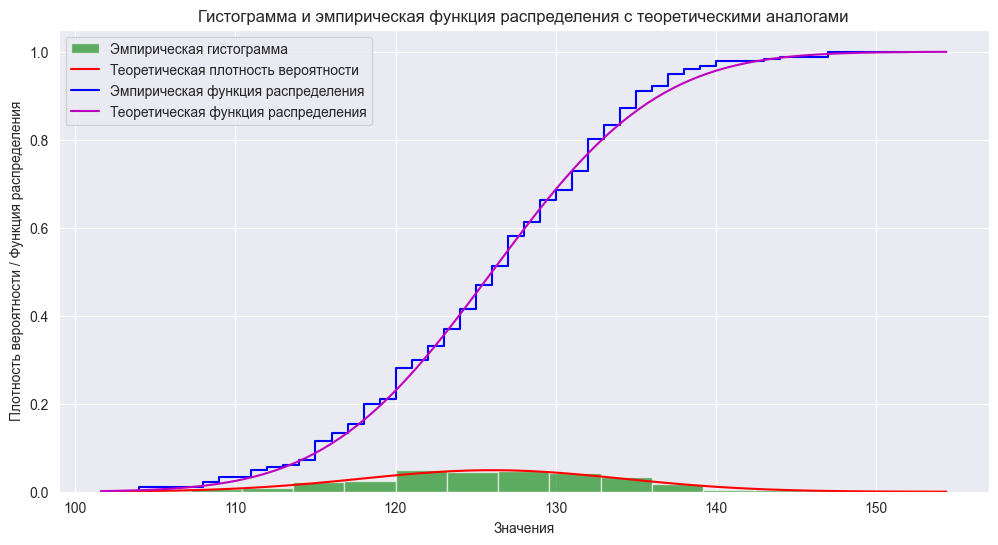

In [11]:
# Оценки параметров нормального распределения
mean_estimate = np.mean(data)
std_estimate = np.std(data, ddof=1)

# Гистограмма выборки
plt.figure(figsize=(12, 6))

# Эмпирическая гистограмма
plt.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Эмпирическая гистограмма',)

# Теоретическая функция плотности вероятности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mean_estimate, std_estimate)
plt.plot(x, pdf, 'r-', label='Теоретическая плотность вероятности')

# Эмпирическая функция распределения (ЭФР)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, ecdf, 'b-', label='Эмпирическая функция распределения')

# Теоретическая функция распределения для нормального распределения
cdf = stats.norm.cdf(x, mean_estimate, std_estimate)
plt.plot(x, cdf, 'm-', label='Теоретическая функция распределения')

# Легенда
plt.legend(loc='best')

# Заголовок и метки осей
plt.title('Гистограмма и эмпирическая функция распределения с теоретическими аналогами')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности / Функция распределения')

# Показать график
plt.grid(True)
plt.show()



# 9. Проверить выполнение правила «трех сигма». 

In [12]:
# Оценки параметров нормального распределения
mean_estimate = np.mean(data)
std_estimate = np.std(data, ddof=1)

# Границы интервала (по правилу "трех сигма")
lower_bound = mean_estimate - 3 * std_estimate
upper_bound = mean_estimate + 3 * std_estimate

# Подсчитаем, сколько значений лежат в этом интервале
values_in_range = [x for x in data if lower_bound <= x <= upper_bound]
percent_in_range = len(values_in_range) / len(data) * 100

# Выводим результат
print(f"Границы интервала по правилу 'трех сигма': ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Количество значений в интервале: {len(values_in_range)}")
print(f"Процент значений в интервале: {percent_in_range:.2f}%")


Границы интервала по правилу 'трех сигма': (101.57, 150.49)
Количество значений в интервале: 180
Процент значений в интервале: 99.45%


# 10. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности. 

In [13]:
# Параметры выборки
n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Интервалы для хи-квадрат теста
num_bins = 10
bins = np.linspace(min(data), max(data), num_bins + 1)
observed_freq, _ = np.histogram(data, bins=bins)

# Теоретические частоты на основе нормального распределения
expected_freq = []
for i in range(num_bins):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    prob = stats.norm.cdf(upper_bound, mean, std_dev) - stats.norm.cdf(lower_bound, mean, std_dev)
    expected_freq.append(prob * n)

# Выполнение теста хи-квадрат
chi_squared_statistic = sum((obs - exp) ** 2 / exp for obs, exp in zip(observed_freq, expected_freq))
critical_value = stats.chi2.ppf(0.95, df=num_bins - 3)  # df = k - 1 - 2 (т.к. 2 параметра оценены по выборке)
accept_null_hypothesis = chi_squared_statistic < critical_value

print(f"Результат теста: {chi_squared_statistic}")
print(f"Критическое значение: {critical_value}")
print(f"Итог: {accept_null_hypothesis}")

Результат теста: 6.240278816711791
Критическое значение: 14.067140449340167
Итог: True


# 11. Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

In [14]:
# Выборочное среднее и исправленная выборочная дисперсия
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Уровень значимости
gamma = 0.95
alpha = 1 - gamma

# Доверительный интервал для генеральной средней
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 1)
CI_mean = (mean - t_critical * (std_dev / np.sqrt(n)), mean + t_critical * (std_dev / np.sqrt(n)))

# Доверительный интервал для генерального среднеквадратического отклонения
chi2_critical_low = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_critical_high = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
CI_std_dev = (np.sqrt((n - 1) * std_dev**2 / chi2_critical_high), np.sqrt((n - 1) * std_dev**2 / chi2_critical_low))

# Вывод результатов
print("Доверительный интервал для генеральной средней:", CI_mean)
print("Доверительный интервал для генерального среднеквадратического отклонения:", CI_std_dev)


Доверительный интервал для генеральной средней: (124.83173085171636, 127.22351776706817)
Доверительный интервал для генерального среднеквадратического отклонения: (7.391356409736207, 9.092723196514504)
